# Installing dependencies

In [4]:
%%capture

!pip install sidetable
!pip install missingno

# Importing necessary modules

In [5]:
# data analysis
import pandas as pd
import numpy as np
import scipy
import sidetable as stb
import missingno as msno

#data viz
import matplotlib.pyplot as plt
import seaborn as sns

#supress warnings
import warnings

#from google.colab import drive
#drive.mount('/content/drive')

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

## Functions required for the project

In [6]:
def eda(df:pd.DataFrame)->None:
  print("-"*15,"DataFrame shape", "-"*15 )
  print(f"Linhas: {df.shape[0]}, Colunas: {df.shape[1]}")
  print("-"*15,"DataFrame info", "-"*15 )
  print(df.info())
  print("-"*15,"DataFrame isna", "-"*15 )
  print(df.isna().sum())
  print("-"*15,"DataFrame is duplicated", "-"*15 )
  print(df.duplicated().sum())
  print("-"*15,"DataFrame describe numeric", "-"*15 )
  print(df.describe(percentiles=[.01,0.1,.25,.5,.75,.90,.99]))
  print("-"*15,"DataFrame desribe categorical", "-"*15 )
  print(df.describe(exclude=[np.number]))




def date_engineering(df: pd.DataFrame)->pd.DataFrame:
    df["data_inversa"]=pd.to_datetime(df["data_inversa"],format='mixed')
    df["year"]=pd.to_datetime(df["data_inversa"]).dt.year
    df["month"]=pd.to_datetime(df["data_inversa"]).dt.month
    df["quarter"]=pd.to_datetime(df["data_inversa"]).dt.quarter
    df["quarter_end"]=pd.to_datetime(df["data_inversa"]).dt.is_quarter_end
    return df


def date_col(col:pd.Series):
  df["dia_semana"]=df['dia_semana'].str.split("-").str[0]
  return df["dia_semana"]

def time_col(col:pd.Series):
  df["hour"] = df["horario"].str.split(":").str[0]

  return df["hour"]

def convert_lower_case(column):
  '''
 
  Function that returns the selected column in lowercase

  param column: column of the pd.DataFrame
  '''
  return column.lower()

## Importing dataset

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
df=pd.read_csv("/content/drive/MyDrive/Santander Coders/Estatistica/datatran2007-2022.csv")
df.head()

,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,10/11/2009,Terça,14:10:00,MG,381.0,495.0,BETIM,Velocidade incompatível,Colisão traseira,Com Vítimas Feridas,...,0,1,0,4,2,NaN,NaN,NaN,NaN,NaN
1,16/10/2009,Sexta,04:35:00,MG,251.0,419.6,GRAO MOGOL,Outras,Colisão frontal,Com Vítimas Fatais,...,5,0,0,5,2,NaN,NaN,NaN,NaN,NaN
2,20/09/2009,Domingo,20:00:00,PI,316.0,24.0,TERESINA,Dormindo,Saída de Pista,Com Vítimas Feridas,...,4,0,0,6,1,NaN,NaN,NaN,NaN,NaN
3,17/05/2009,Domingo,15:45:00,RJ,101.0,429.0,MANGARATIBA,Falta de atenção,Colisão Transversal,Sem Vítimas,...,0,2,0,0,2,NaN,NaN,NaN,NaN,NaN
4,05/07/2009,Domingo,17:30:00,PE,101.0,59.2,RECIFE,Outras,Queda de motocicleta / bicicleta / veículo,Com Vítimas Feridas,...,0,0,0,1,1,NaN,NaN,NaN,NaN,NaN


## Data preprocessing

In [57]:
# Transforming and creating additional columns for dates
df=date_engineering(df)
df["hour"]=time_col(df["horario"])

In [58]:
# Percentage of missing data
df.stb.missing()

,missing,total,percent
delegacia,1563088,1981317,78.891364
uop,1563008,1981317,78.887326
regional,1562206,1981317,78.846848
latitude,1562200,1981317,78.846545
longitude,1562200,1981317,78.846545
ano,515480,1981317,26.017038
km,894,1981317,0.045122
br,894,1981317,0.045122
fase_dia,70,1981317,0.003533
condicao_metereologica,61,1981317,0.003079


In [59]:
#Sorting dates
df=df.sort_values(by="data_inversa")
print(f"{df.head()}")
print(f"{df.tail()}")

        data_inversa dia_semana   horario  uf     br     km  \
1256430   2007-01-01    Segunda  06:30:00  PA  316.0    9.0   
1257103   2007-01-01    Segunda  08:40:00  MG  381.0  397.4   
1256115   2007-01-01    Segunda  15:20:00  SC  282.0   23.0   
1260278   2007-01-01    Segunda  14:00:00  MG   40.0  120.8   
1257102   2007-01-01    Segunda  12:00:00  MG   50.0    0.2   

                         municipio               causa_acidente  \
1256430                 ANANINDEUA  Desobediência à sinalização   
1257103                 NOVA UNIAO                       Outras   
1256115  SANTO AMARO DA IMPERATRIZ  Desobediência à sinalização   
1260278               LAGOA GRANDE                     Dormindo   
1257102                   ARAGUARI                       Outras   

               tipo_acidente classificacao_acidente  ... latitude longitude  \
1256430  Colisão Transversal    Com Vítimas Feridas  ...      NaN       NaN   
1257103       Saída de Pista            Sem Vítimas  ...    

<Axes: >

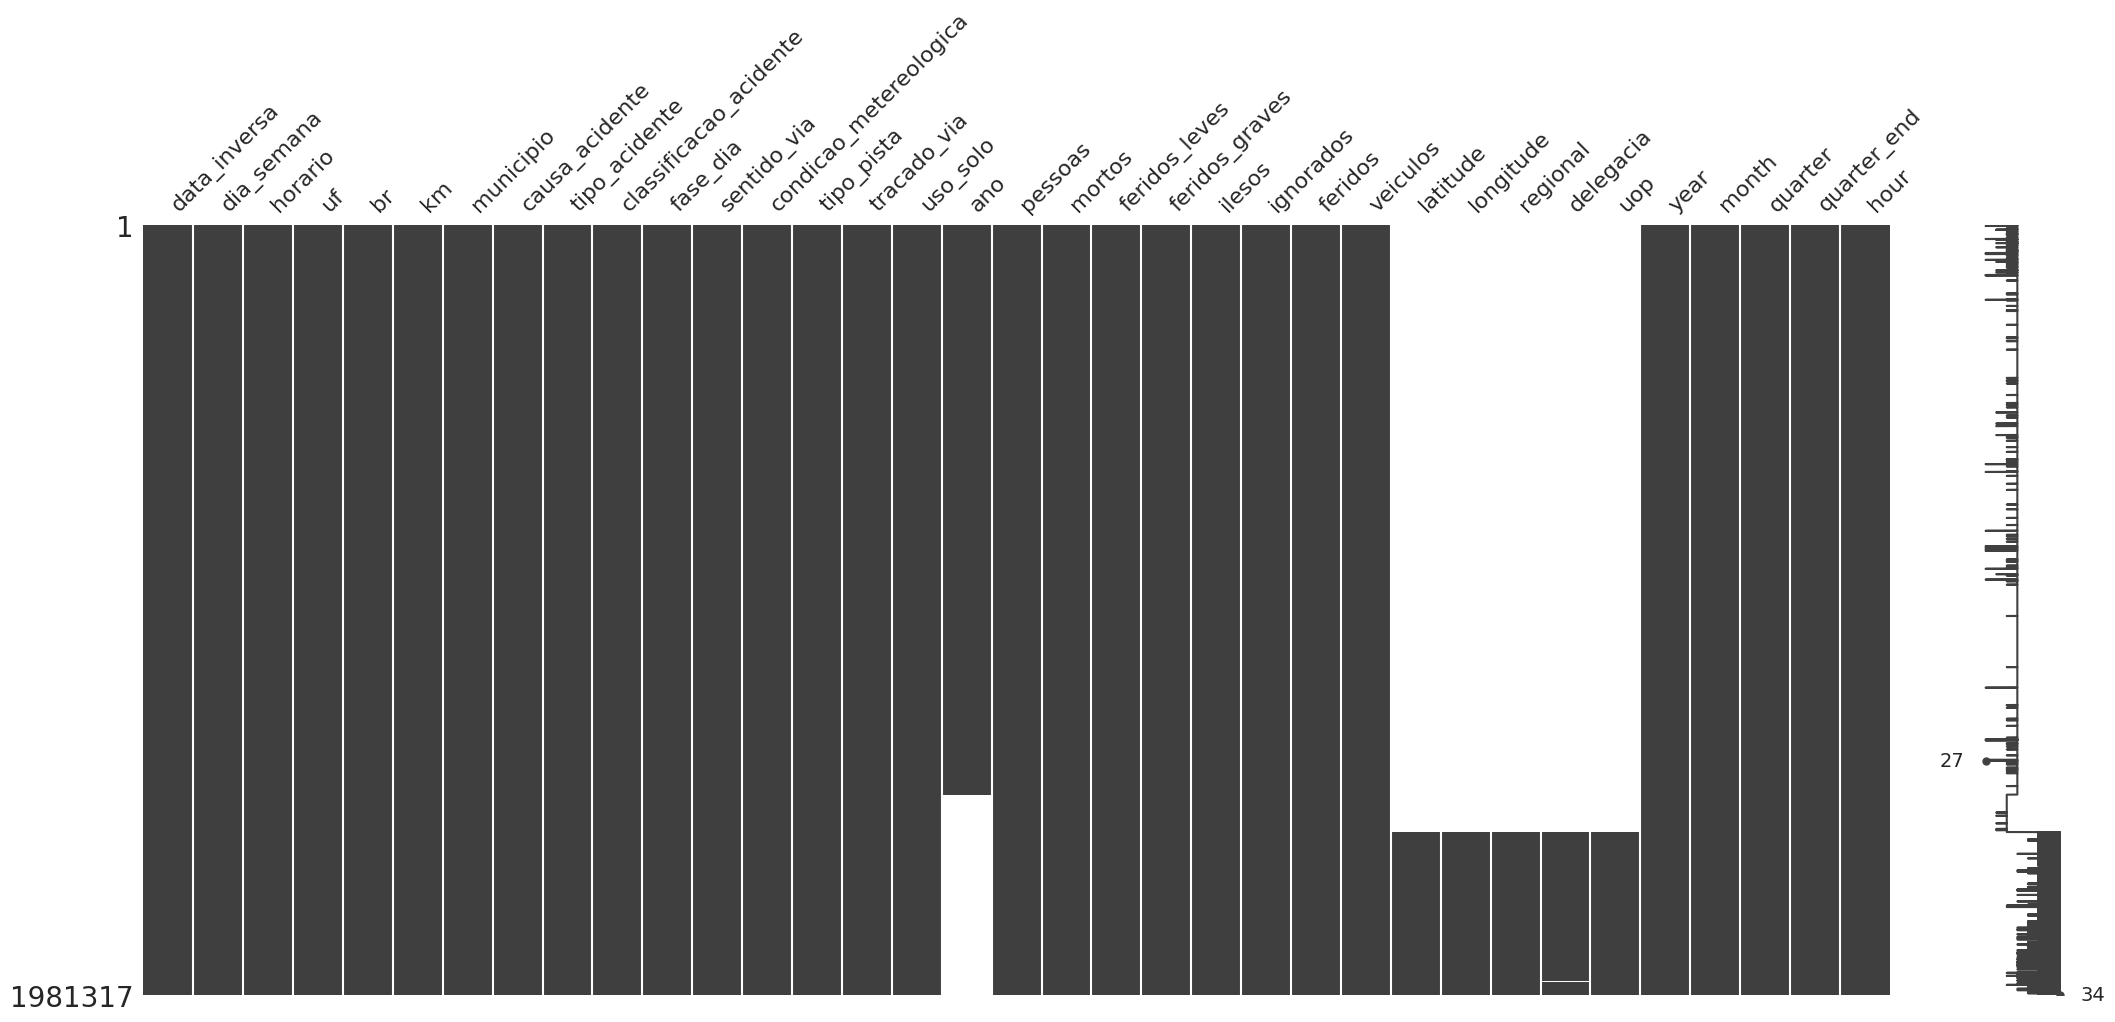

In [60]:
msno.matrix(df)

<Axes: >

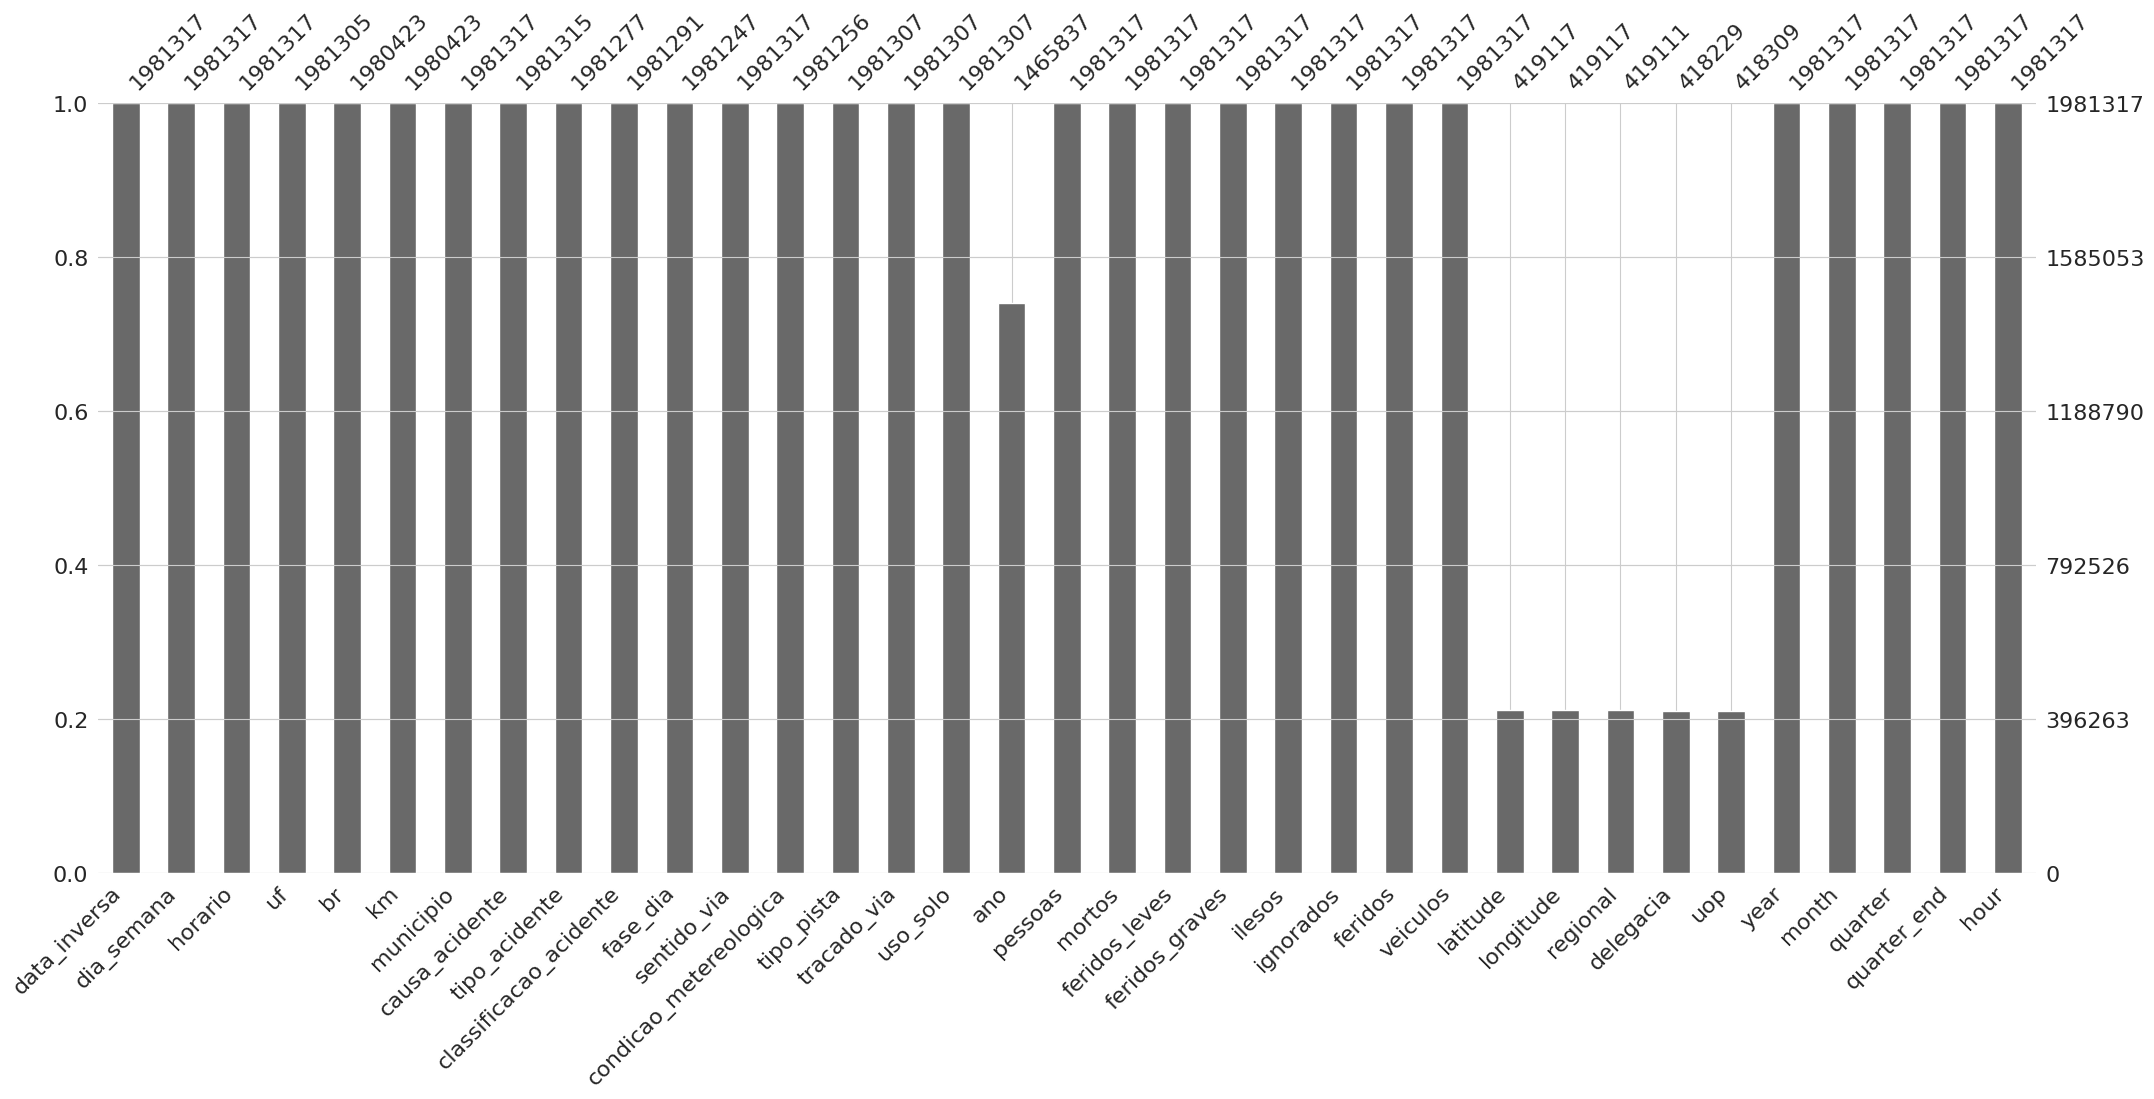

In [61]:
msno.bar(df)

In [62]:
df=df.drop(columns=["latitude","longitude","regional","delegacia","uop","ano","municipio"])

In [63]:
df.stb.missing()

,missing,total,percent
br,894,1981317,0.045122
km,894,1981317,0.045122
fase_dia,70,1981317,0.003533
condicao_metereologica,61,1981317,0.003079
tipo_acidente,40,1981317,0.002019
classificacao_acidente,26,1981317,0.001312
uf,12,1981317,0.000606
tracado_via,10,1981317,0.000505
tipo_pista,10,1981317,0.000505
uso_solo,10,1981317,0.000505


In [64]:
df["date"]=pd.to_datetime(df["data_inversa"])
df["date"].info()

<class 'pandas.core.series.Series'>
Index: 1981317 entries, 1256430 to 1788519
Series name: date
Non-Null Count    Dtype         
--------------    -----         
1981317 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 30.2 MB


In [65]:
df=df.set_index("date")

In [66]:
cat_col=df.select_dtypes(exclude="number").columns.to_list()
num_col=[col for col in df if col not in cat_col]

In [67]:
num_col

['br',
 'pessoas',
 'mortos',
 'feridos_leves',
 'feridos_graves',
 'ilesos',
 'ignorados',
 'feridos',
 'veiculos',
 'year',
 'month',
 'quarter']

In [68]:
cat_col=[
  #'data_inversa',
 'dia_semana',
 #'horario',
 'uf',
 #'km',
 #'municipio',
 'causa_acidente',
 'tipo_acidente',
 'classificacao_acidente',
 'fase_dia',
 'sentido_via',
 'condicao_metereologica',
 'tipo_pista',
 'tracado_via',
 'uso_solo',
 'hour',
  ]

In [69]:
df['dia_semana']=df["dia_semana"].apply(lambda x:convert_lower_case(x))

In [70]:
df.dropna(inplace=True)

In [71]:
np.round(df["causa_acidente"].value_counts(normalize=True)*100,2).nlargest(3).cumsum()

causa_acidente
Falta de atenção                      25.62
Outras                                48.40
Não guardar distância de segurança    56.37
Name: proportion, dtype: float64

In [72]:
np.round(df["tipo_acidente"].value_counts(normalize=True)*100,2).nlargest(5).cumsum()

tipo_acidente
Colisão traseira       25.86
Colisão lateral        40.47
Saída de Pista         52.23
Colisão Transversal    60.13
Tombamento             65.02
Name: proportion, dtype: float64

In [73]:
for col in cat_col:
  df[col]=df[col].apply(lambda x: convert_lower_case(x))

In [74]:
for col in cat_col:
  print(df[col].unique())

['segunda' 'quinta' 'domingo' 'terça' 'sexta' 'quarta' 'sábado'
 'segunda-feira' 'terça-feira' 'quarta-feira' 'quinta-feira' 'sexta-feira']
['pa' 'mg' 'sc' 'pe' 'ro' 'go' 'se' 'rs' 'ms' 'df' 'rj' 'pr' 'ba' 'es'
 'ce' 'pi' 'sp' 'ma' 'rn' 'pb' 'ap' 'mt' 'al' 'to' 'rr' 'am' 'ac']
['desobediência à sinalização' 'outras' 'dormindo'
 'não guardar distância de segurança' 'defeito mecânico em veículo'
 'falta de atenção' 'animais na pista' 'velocidade incompatível'
 'ingestão de álcool' 'ultrapassagem indevida' 'defeito na via'
 'condutor dormindo' 'desobediência às normas de trânsito pelo condutor'
 'falta de atenção à condução' 'pista escorregadia'
 'falta de atenção do pedestre'
 'sinalização da via insuficiente ou inadequada'
 'avarias e/ou desgaste excessivo no pneu' 'mal súbito'
 'defeito mecânico no veículo' 'fenômenos da natureza'
 'restrição de visibilidade' 'objeto estático sobre o leito carroçável'
 'carga excessiva e/ou mal acondicionada'
 'deficiência ou não acionamento do sistema

In [75]:
df["dia_semana"]=date_col(df["dia_semana"])
df["dia_semana"].unique()

array(['segunda', 'quinta', 'domingo', 'terça', 'sexta', 'quarta',
       'sábado'], dtype=object)

In [76]:
df["tipo_acidente"].value_counts(normalize=True).nlargest(10)*100

tipo_acidente
colisão traseira                              25.856050
colisão lateral                               14.609068
saída de pista                                11.760408
colisão transversal                           10.493837
tombamento                                     4.894686
colisão com objeto fixo                        4.756975
capotamento                                    4.655017
colisão frontal                                4.322631
saída de leito carroçável                      3.478436
queda de motocicleta / bicicleta / veículo     2.648734
Name: proportion, dtype: float64

In [77]:
df[num_col]

,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,year,month,quarter
date,,,,,,,,,,,,
2007-01-01,316.0,2,0,1,0,1,0,1,2,2007,1,1
2007-01-01,381.0,1,0,0,0,1,0,0,1,2007,1,1
2007-01-01,282.0,2,0,0,1,1,0,1,2,2007,1,1
2007-01-01,40.0,2,0,0,0,2,0,0,1,2007,1,1
2007-01-01,50.0,4,0,3,1,0,0,4,1,2007,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,153.0,1,0,1,0,0,0,1,1,2022,12,4
2022-12-31,285.0,4,0,0,0,3,1,0,2,2022,12,4
2022-12-31,470.0,2,0,1,1,0,0,2,1,2022,12,4


In [78]:
# Reducing the amount of data

# Condições Metereologica
df['condicao_metereologica'].unique()

array(['ceu claro', 'nublado', 'sol', 'chuva', 'ignorada', 'vento',
       'nevoeiro/neblina', 'granizo', 'neve', 'céu claro',
       'garoa/chuvisco', 'ignorado'], dtype=object)

In [79]:
mapeamento_metereologica = {
    'ceu claro': 'céu claro',
    'céu claro': 'céu claro',  # Tratando as duas formas de 'céu claro' como iguais
    'nublado': 'nublado',
    'sol': 'sol',
    'chuva': 'chuva',
    'garoa/chuvisco': 'chuva',  # Agrupando garoa/chuvisco com chuva
    'vento': 'vento',
    'nevoeiro/neblina': 'nevoeiro',
    'granizo': 'neve',  # Agrupando granizo com neve
    'neve': 'neve',
    'ignorada': 'ignorado',
    'ignorado': 'ignorado'
}

df['condicao_metereologica'] = df['condicao_metereologica'].map(mapeamento_metereologica)


In [80]:
df['condicao_metereologica'].unique()

array(['céu claro', 'nublado', 'sol', 'chuva', 'ignorado', 'vento',
       'nevoeiro', 'neve'], dtype=object)

In [81]:
# Causas dos acidentes
df['causa_acidente'].unique()

array(['desobediência à sinalização', 'outras', 'dormindo',
       'não guardar distância de segurança',
       'defeito mecânico em veículo', 'falta de atenção',
       'animais na pista', 'velocidade incompatível',
       'ingestão de álcool', 'ultrapassagem indevida', 'defeito na via',
       'condutor dormindo',
       'desobediência às normas de trânsito pelo condutor',
       'falta de atenção à condução', 'pista escorregadia',
       'falta de atenção do pedestre',
       'sinalização da via insuficiente ou inadequada',
       'avarias e/ou desgaste excessivo no pneu', 'mal súbito',
       'defeito mecânico no veículo', 'fenômenos da natureza',
       'restrição de visibilidade',
       'objeto estático sobre o leito carroçável',
       'carga excessiva e/ou mal acondicionada',
       'deficiência ou não acionamento do sistema de iluminação/sinalização do veículo',
       'ingestão de substâncias psicoativas',
       'reação tardia ou ineficiente do condutor', 'agressão externa'

In [82]:
quantidade_valores_unicos = df['causa_acidente'].nunique()
print("Quantidade de valores únicos na coluna 'causa_acidente':", quantidade_valores_unicos)

# Exibir todos os valores únicos na coluna 'causa_acidente' em uma linha
valores_unicos = df['causa_acidente'].unique()
valores_unicos_str = ', '.join(valores_unicos)
print("Valores únicos na coluna 'causa_acidente':", valores_unicos_str)

# Salvar todos os valores únicos em um arquivo
with open('valores_unicos_causa_acidente.txt', 'w', encoding='utf-8') as arquivo:
    for valor in valores_unicos:
        arquivo.write(valor + '\n')

print("Valores únicos salvos no arquivo 'valores_unicos_causa_acidente.txt'")

Quantidade de valores únicos na coluna 'causa_acidente': 91
Valores únicos na coluna 'causa_acidente': desobediência à sinalização, outras, dormindo, não guardar distância de segurança, defeito mecânico em veículo, falta de atenção, animais na pista, velocidade incompatível, ingestão de álcool, ultrapassagem indevida, defeito na via, condutor dormindo, desobediência às normas de trânsito pelo condutor, falta de atenção à condução, pista escorregadia, falta de atenção do pedestre, sinalização da via insuficiente ou inadequada, avarias e/ou desgaste excessivo no pneu, mal súbito, defeito mecânico no veículo, fenômenos da natureza, restrição de visibilidade, objeto estático sobre o leito carroçável, carga excessiva e/ou mal acondicionada, deficiência ou não acionamento do sistema de iluminação/sinalização do veículo, ingestão de substâncias psicoativas, reação tardia ou ineficiente do condutor, agressão externa, desobediência às normas de trânsito pelo pedestre, acumulo de areia ou detrit

In [83]:
mapeamento_causas = {
    'desobediência à sinalização': 'desobediência',
    'outras': 'outras',
    'dormindo': 'distração',
    'não guardar distância de segurança': 'distância insegura',
    'defeito mecânico em veículo': 'defeito mecânico',
    'falta de atenção': 'distração',
    'animais na pista': 'presença de animais',
    'velocidade incompatível': 'velocidade inadequada',
    'ingestão de álcool': 'álcool/drogas',
    'ultrapassagem indevida': 'ultrapassagem',
    'defeito na via': 'condição da via',
    'condutor dormindo': 'distração',
    'desobediência às normas de trânsito pelo condutor': 'desobediência',
    'falta de atenção à condução': 'distração',
    'pista escorregadia': 'condição da via',
    'falta de atenção do pedestre': 'distração',
    'sinalização da via insuficiente ou inadequada': 'sinalização inadequada',
    'avarias e/ou desgaste excessivo no pneu': 'defeito mecânico',
    'mal súbito': 'mal súbito',
    'defeito mecânico no veículo': 'defeito mecânico',
    'fenômenos da natureza': 'fenômenos naturais',
    'restrição de visibilidade': 'visibilidade reduzida',
    'objeto estático sobre o leito carroçável': 'obstáculo na via',
    'carga excessiva e/ou mal acondicionada': 'carga mal acondicionada',
    'deficiência ou não acionamento do sistema de iluminação/sinalização do veículo': 'falha nos sistemas do veículo',
    'ingestão de substâncias psicoativas': 'álcool/drogas',
    'reação tardia ou ineficiente do condutor': 'falha do condutor',
    'agressão externa': 'agressão',
    'desobediência às normas de trânsito pelo pedestre': 'desobediência',
    'acumulo de areia ou detritos sobre o pavimento': 'condição da via',
    'ingestão de álcool e/ou substâncias psicoativas pelo pedestre': 'álcool/drogas',
    'ingestão de álcool pelo condutor': 'álcool/drogas',
    'curva acentuada': 'condição da via',
    'desrespeitar a preferência no cruzamento': 'desrespeito à preferência',
    'pedestre andava na pista': 'pedestre na via',
    'pista em desnível': 'condição da via',
    'chuva': 'condição climática',
    'demais falhas mecânicas ou elétricas': 'defeito mecânico',
    'pista esburacada': 'condição da via',
    'ausência de reação do condutor': 'falha do condutor',
    'transitar na contramão': 'infração de trânsito',
    'obras na pista': 'condição da via',
    'ingestão de álcool ou de substâncias psicoativas pelo pedestre': 'álcool/drogas',
    'conversão proibida': 'infração de trânsito',
    'trafegar com motocicleta (ou similar) entre as faixas': 'infração de trânsito',
    'condutor deixou de manter distância do veículo da frente': 'distância insegura',
    'iluminação deficiente': 'falha nos sistemas do veículo',
    'acessar a via sem observar a presença dos outros veículos': 'falta de atenção',
    'deficiência do sistema de iluminação/sinalização': 'falha nos sistemas do veículo',
    'fumaça': 'condição da via',
    'manobra de mudança de faixa': 'manobra imprudente',
    'demais fenômenos da natureza': 'fenômenos naturais',
    'falta de acostamento': 'infraestrutura inadequada',
    'acesso irregular': 'infração de trânsito',
    'transitar no acostamento': 'infração de trânsito',
    'condutor usando celular': 'distração',
    'condutor desrespeitou a iluminação vermelha do semáforo': 'infração de trânsito',
    'acumulo de água sobre o pavimento': 'condição da via',
    'afundamento ou ondulação no pavimento': 'condição da via',
    'ausência de sinalização': 'sinalização inadequada',
    'estacionar ou parar em local proibido': 'infração de trânsito',
    'entrada inopinada do pedestre': 'falta de atenção do pedestre',
    'mal súbito do condutor': 'mal súbito',
    'demais falhas na via': 'condição da via',
    'acumulo de óleo sobre o pavimento': 'condição da via',
    'acostamento em desnível': 'infraestrutura inadequada',
    'pedestre cruzava a pista fora da faixa': 'falta de atenção do pedestre',
    'sinalização mal posicionada': 'sinalização inadequada',
    'desvio temporário': 'condição da via',
    'falta de elemento de contenção que evite a saída do leito carroçável': 'infraestrutura inadequada',
    'declive acentuado': 'condição da via',
    'redutor de velocidade em desacordo': 'condição da via',
    'frear bruscamente': 'manobra imprudente',
    'problema com o freio': 'falha nos sistemas do veículo',
    'retorno proibido': 'infração de trânsito',
    'ingestão de substâncias psicoativas pelo condutor': 'álcool/drogas',
    'obstrução na via': 'obstrução na via',
    'área urbana sem a presença de local apropriado para a travessia de pedestres': 'infraestrutura inadequada',
    'problema na suspensão': 'falha nos sistemas do veículo',
    'deixar de acionar o farol da motocicleta (ou similar)': 'falha nos sistemas do veículo',
    'restrição de visibilidade em curvas verticais': 'visibilidade reduzida',
    'restrição de visibilidade em curvas horizontais': 'visibilidade reduzida',
    'semáforo com defeito': 'sinalização inadequada',
    'faixas de trânsito com largura insuficiente': 'infraestrutura inadequada',
    'neblina': 'condição climática',
    'transitar na calçada': 'infração de trânsito',
    'faróis desregulados': 'falha nos sistemas do veículo',
    'sinalização encoberta': 'sinalização inadequada',
    'participar de racha': 'infração de trânsito',
    'modificação proibida': 'infração de trânsito',
    'sistema de drenagem ineficiente': 'infraestrutura inadequada'
}

df['causa_acidente'] = df['causa_acidente'].map(mapeamento_causas)

In [84]:
df['causa_acidente'].unique()

array(['desobediência', 'outras', 'distração', 'distância insegura',
       'defeito mecânico', 'presença de animais', 'velocidade inadequada',
       'álcool/drogas', 'ultrapassagem', 'condição da via',
       'sinalização inadequada', 'mal súbito', 'fenômenos naturais',
       'visibilidade reduzida', 'obstáculo na via',
       'carga mal acondicionada', 'falha nos sistemas do veículo',
       'falha do condutor', 'agressão', 'desrespeito à preferência',
       'pedestre na via', 'condição climática', 'infração de trânsito',
       'falta de atenção', 'manobra imprudente',
       'infraestrutura inadequada', 'falta de atenção do pedestre',
       'obstrução na via'], dtype=object)

In [85]:
# Tipos de acidentes
df['tipo_acidente'].unique()

array(['colisão transversal', 'saída de pista', 'colisão lateral',
       'colisão com bicicleta', 'colisão traseira',
       'colisão com objeto fixo', 'capotamento',
       'queda de motocicleta / bicicleta / veículo', 'incêndio',
       'atropelamento de pessoa', 'colisão frontal',
       'atropelamento de animal', 'colisão com objeto móvel',
       'tombamento', 'derramamento de carga', 'danos eventuais',
       'colisão com objeto estático', 'saída de leito carroçável',
       'queda de ocupante de veículo', 'atropelamento de pedestre',
       'engavetamento', 'colisão com objeto em movimento',
       'colisão com objeto', 'colisão lateral mesmo sentido',
       'eventos atípicos', 'colisão lateral sentido oposto'], dtype=object)

In [86]:
mapeamento_acidente = {
    'colisão transversal': 'colisão',
    'saída de pista': 'saída de pista',
    'colisão lateral': 'colisão',
    'colisão com bicicleta': 'colisão',
    'colisão traseira': 'colisão',
    'colisão com objeto fixo': 'colisão',
    'capotamento': 'capotamento',
    'queda de motocicleta / bicicleta / veículo': 'queda',
    'incêndio': 'incêndio',
    'atropelamento de pessoa': 'atropelamento de pessoa',
    'colisão frontal': 'colisão',
    'atropelamento de animal': 'atropelamento de animal',
    'colisão com objeto móvel': 'colisão',
    'tombamento': 'tombamento',
    'derramamento de carga': 'derramamento de carga',
    'danos eventuais': 'outros',
    'colisão com objeto estático': 'colisão',
    'saída de leito carroçável': 'saída de pista',
    'queda de ocupante de veículo': 'queda',
    'atropelamento de pedestre': 'atropelamento de pessoa',
    'engavetamento': 'colisão',
    'colisão com objeto em movimento': 'colisão',
    'colisão com objeto': 'colisão',
    'colisão lateral mesmo sentido': 'colisão',
    'eventos atípicos': 'outros',
    'colisão lateral sentido oposto': 'colisão'
}

df['tipo_acidente'] = df['tipo_acidente'].map(mapeamento_acidente)

In [87]:
df['tipo_acidente'].unique()

array(['colisão', 'saída de pista', 'capotamento', 'queda', 'incêndio',
       'atropelamento de pessoa', 'atropelamento de animal', 'tombamento',
       'derramamento de carga', 'outros'], dtype=object)

# Concepts and tools of Statistics

__1) Within a dataset, classify its columns as Discrete Quantitative, Continuous Quantitative, Ordinal Qualitative, or Nominal Qualitative.__


__2) With the same dataset, build the probability distribution of a feature with integer values. Write a function to calculate the Mean and another function to calculate the Variance of this random variable. Compare the result of your function with the results from a native Python function (there are many modules/libraries that calculate these parameters). Construct a function that serves the role of cdf() and another function with the role of sf(). Extra challenge: build functions that serve the roles of ppf() and isf(). .__'.f'.

 __3) Using the random variable from the previous exercise, build the distribution of sample means to illustrate/confirm the Central Limit Theorem. Compare the mean and variance with the previous exercise. Use the normality test to verify whether this distribution (of sample means) is normal or not.__


__4) In the previous exercise, construct the confidence interval for the mean, with a confidence level of 95% and a percentage error of 2% (up or down).__

__5) If a sample of size 30, taken from the random variable in exercise 2), has a mean 10% higher than the population mean, would the hypothesis that these means are equal be rejected or not rejected, with a confidence level of 95%? (perform the hypothesis test to answer this question).__


In [88]:
df.shape

(1980229, 28)

In [39]:
df[["feridos","mortos", "feridos_graves"]][df.mortos > 0].sample(10)

,feridos,mortos,feridos_graves
date,,,
2009-09-22,1.0,2.0,1.0
2009-06-09,2.0,2.0,2.0
2008-03-01,0.0,1.0,0.0
2009-09-22,1.0,1.0,0.0
2009-10-18,1.0,1.0,1.0
2009-08-29,1.0,1.0,1.0
2009-12-29,4.0,1.0,0.0
2009-06-02,0.0,1.0,0.0
2009-09-17,0.0,1.0,0.0


# Questions

__2) With the same dataset, build the probability distribution of a feature with integer values. Write a function to calculate the Mean and another function to calculate the Variance of this random variable. Compare the result of your function with the results from a native Python function (there are many modules/libraries that calculate these parameters). Construct a function that serves the role of cdf() and another function with the role of sf(). Extra challenge: build functions that serve the roles of ppf() and isf().__'.f'.

In [93]:
df.sample(5)

,data_inversa,dia_semana,horario,uf,br,km,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,...,feridos_graves,ilesos,ignorados,feridos,veiculos,year,month,quarter,quarter_end,hour
date,,,,,,,,,,,,,,,,,,,,,
2015-12-30,2015-12-30,quarta,08:35:00,rn,405.0,68.8,distração,saída de pista,sem vítimas,pleno dia,...,0,3,0,0,3,2015,12,4,False,08
2013-03-28,2013-03-28,quinta,09:55:00,ro,364.0,568.0,desobediência,colisão,sem vítimas,pleno dia,...,0,2,0,0,2,2013,3,1,False,09
2007-06-02,2007-06-02,terça,21:00:00,go,153.0,570.0,outras,saída de pista,sem vítimas,plena noite,...,0,1,0,0,1,2007,6,2,False,21
2007-03-08,2007-03-08,sexta,13:45:00,pb,230.0,172.5,distração,colisão,sem vítimas,pleno dia,...,0,2,0,0,2,2007,3,1,False,13
2022-09-13,2022-09-13,terça,17:45:00,sp,116.0,223,infração de trânsito,capotamento,com vítimas feridas,plena noite,...,0,0,0,2,1,2022,9,3,False,17


In [89]:
df.feridos.shape

(1980229,)

In [90]:
feridos = (df.feridos > 0).astype(int)
mortos =  (df.mortos > 0).astype(int)

In [91]:
len(feridos)

1980229

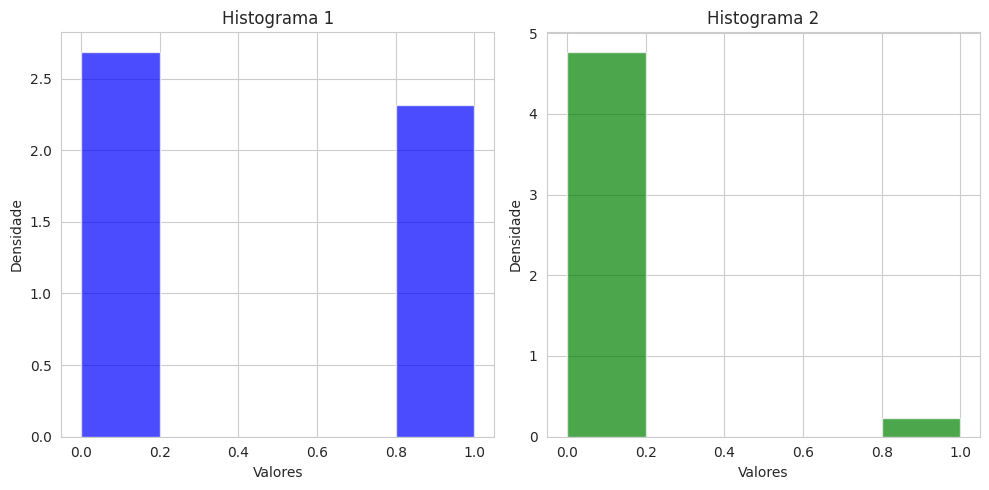

In [96]:
## histograma dos feridos e mortos
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Histograma 1
axs[0].hist(feridos, bins=5, color='blue', alpha=0.7
            , density = True)
axs[0].set_title('Histograma 1')
axs[0].set_xlabel('Valores')
axs[0].set_ylabel('Densidade')

# Histograma 2
axs[1].hist(mortos, bins=5, color='green', alpha=0.7, density = True)
axs[1].set_title('Histograma 2')
axs[1].set_xlabel('Valores')
axs[1].set_ylabel('Densidade')


plt.tight_layout()
plt.show()

In [102]:
# Probabilidade

print( f"Probabilidade de haver feridos em um acidente:  {sum(feridos)/feridos.shape[0]:.4f}")
print( f"Probabilidade de haver mortos em um acidente: {sum(mortos)/mortos.shape[0]:.4f}")



Probabilidade de haver feridos em um acidente:  0.4624
Probabilidade de haver mortos em um acidente: 0.0459


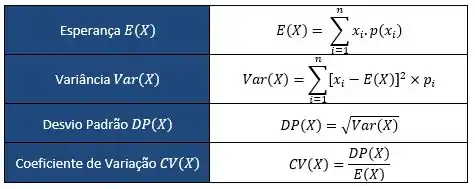

$$ E[X] = \mu = \sum_{i=1}^{n} x_i \cdot P(x_i) $$



In [126]:

def esperanca(dados):
    if len(dados) == 0:
        return None
    else:
        return 1 * (sum(dados)/len(dados))

In [124]:
esperanca(feridos)

0.46238793594074223

In [125]:
np.mean(feridos)

0.46238793594074223

$$ VAR(X) = E[(X - \mu)^2] = E[X^2] - (E[X])^2 $$



In [114]:
def variancia(dados):
    x2 = [x**2 for x in dados]
    ex2 = esperanca(x2)
    var = ex2 - esperanca(dados)**2 #E[X2]−(E[X])2
    return var


In [122]:
print(variancia(feridos))

0.24858533263720228


In [123]:
np.var(feridos)

0.24858533263720226

## Bernoulli

The **Bernoulli distribution** is a type of discrete probability distribution that models a random variable that can have only two possible outcomes: success (typically represented by 1) or failure (typically represented by 0).

The Bernoulli distribution is defined by the following function:

$$
f(x; p) =
\begin{cases}
p & \text{,for } x = 1 \\
1-p & \text{,for } x = 0 \\
\end{cases}
$$

where:
- $ x $ It is the result of the random variable (1 for success, 0 for failure),
- $ p $ It is the probability of success (i.e., the probability of obtaining a result of 1).


the expectation (or mean) and the variance of a Bernoulli distribution can be calculated using the following formulas:

$$
\text{Esperança} (E[X]) = p
$$

$$\text{Variância} (\sigma^2) = p(1-p)$$


-----------------
In this case, we are dealing with accidents, where each accident can result in injuries or not, as well as fatalities or not. We can model this situation with a random variable following a Bernoulli distribution.

The random variable here represents a binary event: the occurrence or non-occurrence of injuries or fatalities in an accident. If we define "success" as the occurrence of injuries or fatalities in an accident, then "failure" would be the non-occurrence of these events. Thus, the Bernoulli distribution can be expressed as:

**CDF (Cumulative Distribution Function):**

In [192]:
p_feridos = 0.4623
p_morte = 0.0459

In [143]:
def bern_cdf(x, p):
  if x == 0:
      return 1 - p
  elif x == 1:
      return 1
  else:
      return None

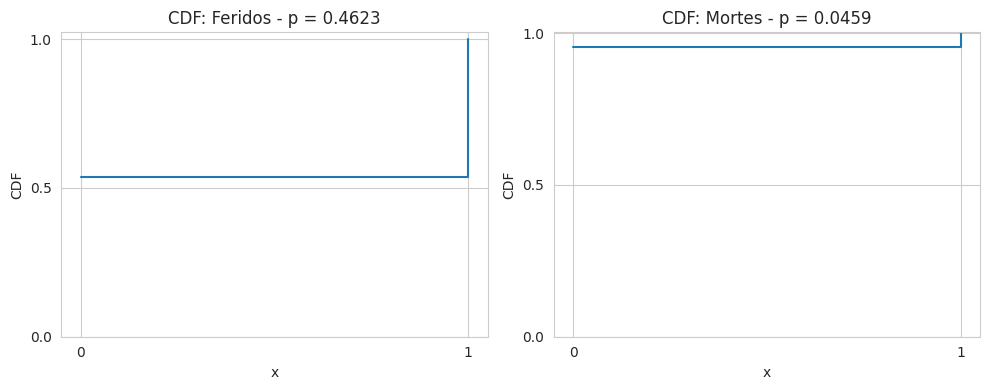

In [166]:
cdf_feridos = [bern_cdf(x,p_feridos) for x in [0,1]]
cdf_morte = [bern_cdf(x,p_morte) for x in [0,1]]

# Criar a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plotar o primeiro gráfico
axs[0].step([0,1], cdf_feridos, where='post')
axs[0].set_xlabel('x')
axs[0].set_ylabel('CDF')
axs[0].set_title('CDF: Feridos - p = 0.4623')
axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 0.5, 1])
axs[0].grid(True)

# Plotar o segundo gráfico
axs[1].step([0,1], cdf_morte, where='post')
axs[1].set_xlabel('x')
axs[1].set_ylabel('CDF')
axs[1].set_title('CDF: Mortes - p = 0.0459')
axs[1].set_xticks([0, 1])
axs[1].set_yticks([0, 0.5, 1])
axs[1].grid(True)

# Ajustar o layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

**SF (Survival Function):**  **1- CDF**

In [132]:

def bern_cdf_sf(x, p):
  return 1 - bern_cdf(x, p)

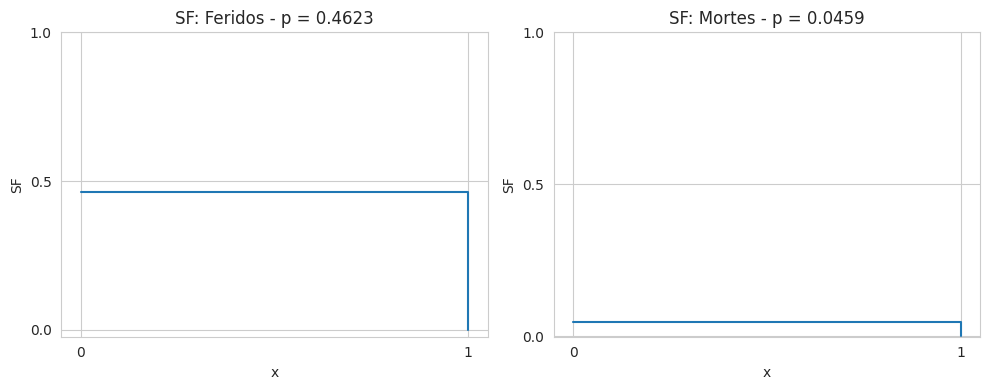

In [168]:
sf_feridos = [bern_cdf_sf(x,p_feridos) for x in [0,1]]
sf_morte = [bern_cdf_sf(x,p_morte) for x in [0,1]]

# Create the figure and the subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first graphic
axs[0].step([0,1], sf_feridos, where='post')
axs[0].set_xlabel('x')
axs[0].set_ylabel('SF')
axs[0].set_title('SF: Feridos - p = 0.4623')
axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 0.5, 1])
axs[0].grid(True)

# Plotar o segundo gráfico
axs[1].step([0,1], sf_morte, where='post')
axs[1].set_xlabel('x')
axs[1].set_ylabel('SF')
axs[1].set_title('SF: Mortes - p = 0.0459')
axs[1].set_xticks([0, 1])
axs[1].set_yticks([0, 0.5, 1])
axs[1].grid(True)

# Ajustar o layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

**PPF (Percentile Function):**

In [137]:
def bern_ppf(q, p):
  if q < 1 - p:
      return 0
  elif q >= 1 - p:
      return 1
  else:
      return None

**ISF (inverse Percentile Function):**

In [138]:
def bern_ppf(q, p):
  return minha_ppf(1 - q, p)


3) Using the random variable from the previous exercise, build the distribution of sample means to illustrate/confirm the Central Limit Theorem. Compare the mean and variance with the previous exercise. Use the normality test to verify whether this distribution (of sample means) is normal or not.

The **Central Limit Theorem (CLT) (TCL)**, Applied to the sample means of a random variable \( X \) with any sample distribution and finite variance, implies that the means exhibit distributions tending towards the normal distribution as the number of observations in the samples  \( n \)  increases.


In [205]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from scipy.stats import norm

# Função para plotar o histograma das médias das amostras
def plot_histogram(n_amostras):
    plt.figure(figsize=(15, 8))
    # Parâmetro da distribuição de Bernoulli (probabilidade de sucesso)
    p = p_feridos

    # Tamanho de cada amostra
    tamanho_amostra = 500

    # Simular amostras de uma distribuição de Bernoulli
    amostras = np.random.binomial(1, p, size=(n_amostras, tamanho_amostra))

    # Calcular as médias de cada amostra
    medias_amostras = np.mean(amostras, axis=1)

    # Plotar histograma das médias das amostras
    plt.hist(medias_amostras, bins=30, density=True, alpha=0.7, color='blue', label='Distribuição das Médias')

    # Parâmetros da curva normal
    media_normal = p
    variancia_normal = p * (1 - p)/tamanho_amostra
    desvio_padrao_normal = np.sqrt(variancia_normal)

    # Gerar dados para a curva normal
    x = np.linspace(0.35, 0.6, 100)
    y = norm.pdf(x, media_normal, desvio_padrao_normal)

    # Plotar curva normal sobreposta
    plt.plot(x, y, color='red', label='Curva Normal')

    plt.title('Distribuição das Médias de Amostras de uma Distribuição de Bernoulli')
    plt.xlabel('Média das Amostras: Feridos')
    plt.ylabel('Densidade')
    plt.grid(True)
    plt.legend()
    plt.show()

# Controle deslizante interativo para o número de amostras
slider_n_amostras = widgets.IntSlider(value=10, min=10, max=10000, step=5, description='Nº Amostras')

# Função de interatividade
widgets.interactive(plot_histogram, n_amostras=slider_n_amostras)


interactive(children=(IntSlider(value=10, description='Nº Amostras', max=10000, min=10, step=5), Output()), _d…

Fazer sobre as médias.

##  Shapiro-Wilk Test

The Shapiro-Wilk test is a test of normality.

### test steps:

1. **Hipóteses**:
   - \( H0 \): The data follows a normal distribution
   - \( H1 \): The data does not follow a normal distribution.

2. **Calculate the Shapiro-Wilk test statistic** from the observed data.

3. **Calculate the p-value** associated with the test statistic.

4. **Compare the p-value** with a pre-defined significance level (por exemple, \( $\alpha$ = 0.05 \)).  

5. If the p-value is less than ( $\alpha$ \), **we reject the null hypothesis** and conclude that the data does not follow a normal distribution. Otherwise, we do not reject the null hypothesis, and we cannot claim that the data does not follow a normal distribution.


In [206]:
import scipy
scipy.stats.shapiro(medias_amostras)

ShapiroResult(statistic=0.9987831711769104, pvalue=0.7439082860946655)

**Therefore, at the $95\% confidence level, we do not have evidence to reject the null hypothesis of normality of the data.**

In [210]:
media_feridos = np.mean(feridos)
var_feridos = np.var(feridos)
N = len(feridos)

In [211]:
IC = ([media_feridos - (1.96*np.sqrt(var_feridos)/np.sqrt(N)) , media_feridos + (1.96*np.sqrt(var_feridos)/np.sqrt(N))])
IC

[0.4616934937263012, 0.46308237815518327]

In [214]:
IC_p2 = ([media_feridos - 0.1 , media_feridos + 0.1])
IC_p2

[0.36238793594074226, 0.5623879359407422]

**Estatística de teste:**


### Hipóteses do Teste:

- **Hipótese Nula $(H0) $**: As médias da amostra e da população são iguais.
- **Hipótese Alternativa $ (H1) $**: A média da amostra é 10% maior do que a média da população.

### Estatística de Teste:

A estatística de teste t é calculada como:

$$
t = \frac{{\bar{x} - \mu}}{{\frac{{s}}{{\sqrt{n}}}}}
$$

Onde:
- $\bar{x}$ é a média da amostra,
- $\mu$ é a média da população,
- $s$ é o desvio padrão da amostra e
- $n$ é o tamanho da amostra.


In [215]:
import numpy as np
from scipy.stats import t

# Dados fornecidos
media_populacao = np.mean(feridos)
media_amostra = 1.10 * media_populacao
desvio_padrao_amostra =  np.sqrt(np.var(feridos))/np.sqrt(len(feridos))
tamanho_amostra = 30

# Estatística de teste t
t_stat = (media_amostra - media_populacao) / (desvio_padrao_amostra / np.sqrt(tamanho_amostra))

# Valor crítico  (95% de confiança)
graus_liberdade = tamanho_amostra - 1
valor_critico = t.ppf(0.95, graus_liberdade)

# Comparação com o valor crítico
if t_stat > valor_critico:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")


Rejeitamos a hipótese nula.



### Hipóteses do Teste:

- **Null Hypothesis $(H0)$**: The sample and population means are equal.
- **Alternative Hypothesis $( H1)$**: The sample mean is 10% greater than the population mean.

### Test using Normal Distribution:

 **Calculation of the Z statistic:**
   - The Z test statistic is calculated as:
$
   Z = \frac{{\bar{x} - \mu}}{{\frac{{\sigma}}{{\sqrt{n}}}}}
$
   where:
     - \$\bar{x}\$ It is the sample mean,
     - \$\mu\$ It is the population mean,
     - \$\sigma\$ It is the population standard deviation and
     - \$n\$ it is the sample size.

In [217]:
# Dados fornecidos
media_populacao = np.mean(feridos)
media_amostra = 1.10 * media_populacao
desvio_padrao_amostra =  np.sqrt(np.var(feridos))/np.sqrt(len(feridos))
tamanho_amostra = 30

# Estatística de teste Z
Z_stat = (media_amostra - media_populacao) / (desvio_padrao_amostra / np.sqrt(tamanho_amostra))


# Valor crítico para um teste bilateral (95% de confiança)
valor_critico_superior = norm.ppf(0.975)  # 0.975 para uma cauda superior de 97.5% de confiança
valor_critico_inferior = norm.ppf(0.025)  # 0.025 para uma cauda inferior de 2.5% de confiança

# Comparação com os valores críticos
if Z_stat > valor_critico_superior or Z_stat < valor_critico_inferior:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")

Rejeitamos a hipótese nula.
